## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.8, 0.5]

In [10]:
results = {}
for mmt in MOMENTUM:
    for nesterov in [True, False]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with momentum = %.6f" % (mmt))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=mmt)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-mmt-%s-nest-%s" % (str(mmt), str(nesterov))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with momentum = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.9167 - acc: 0.3045 - val_loss: 1.7422 - val_acc: 0.3805
Epoch 2/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6910 - acc: 0.3913 - val_loss: 1.6735 - val_acc: 0.4136
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6119 - acc: 0.4230 - val_loss: 1.6241 - val_acc: 0.4195
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5630 - acc: 0.4387 - val_loss: 1.5903 - val_acc: 0.4348
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5067 - acc: 0.4607 - val_loss: 1.5156 - val_acc: 0.4567
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4598 - acc: 0.4787 - val_loss: 1.5131 - val_acc: 0.4673
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4353 - acc: 0.4879 - val_loss: 1.4862 - val_acc

50000/50000 [==============================] - 2s 38us/step - loss: 1.7180 - acc: 0.3915 - val_loss: 1.7508 - val_acc: 0.3837
Epoch 3/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6336 - acc: 0.4239 - val_loss: 1.5868 - val_acc: 0.4416
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5723 - acc: 0.4440 - val_loss: 1.7576 - val_acc: 0.3803
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5240 - acc: 0.4599 - val_loss: 1.6535 - val_acc: 0.4159
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.4838 - acc: 0.4746 - val_loss: 1.6804 - val_acc: 0.4101
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4532 - acc: 0.4868 - val_loss: 1.5140 - val_acc: 0.4533
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.4191 - acc: 0.4971 - val_loss: 1.4901 - val_acc: 0.4601
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 38us/step - loss: 1.6360 - acc: 0.4212 - val_loss: 1.6047 - val_acc: 0.4296
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5771 - acc: 0.4424 - val_loss: 1.5918 - val_acc: 0.4335
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5243 - acc: 0.4595 - val_loss: 1.5611 - val_acc: 0.4443
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4829 - acc: 0.4740 - val_loss: 1.4969 - val_acc: 0.4719
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4521 - acc: 0.4859 - val_loss: 1.5455 - val_acc: 0.4484
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4244 - acc: 0.4922 - val_loss: 1.4951 - val_acc: 0.4656
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3923 - acc: 0.5055 - val_loss: 1.4600 - val_acc: 0.4766
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 38us/step - loss: 1.6881 - acc: 0.4047 - val_loss: 1.6726 - val_acc: 0.3993
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6466 - acc: 0.4184 - val_loss: 1.7809 - val_acc: 0.3855
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6127 - acc: 0.4317 - val_loss: 1.8600 - val_acc: 0.3343
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5828 - acc: 0.4426 - val_loss: 1.6135 - val_acc: 0.4244
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5488 - acc: 0.4547 - val_loss: 1.6094 - val_acc: 0.4247
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5321 - acc: 0.4584 - val_loss: 1.6546 - val_acc: 0.4182
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5099 - acc: 0.4680 - val_loss: 1.5306 - val_acc: 0.4500
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 2s 36us/step - loss: 1.6340 - acc: 0.4255 - val_loss: 1.6206 - val_acc: 0.4256
Epoch 6/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.5973 - acc: 0.4369 - val_loss: 1.6637 - val_acc: 0.4110
Epoch 7/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.5676 - acc: 0.4473 - val_loss: 1.5525 - val_acc: 0.4539
Epoch 8/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.5382 - acc: 0.4601 - val_loss: 1.5472 - val_acc: 0.4532
Epoch 9/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.5162 - acc: 0.4656 - val_loss: 1.7611 - val_acc: 0.3847
Epoch 10/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.4970 - acc: 0.4714 - val_loss: 1.5573 - val_acc: 0.4502
Epoch 11/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.4737 - acc: 0.4817 - val_loss: 1.6105 - val_acc: 0.4269
Epoch 12/50
50000/50000 [=========================

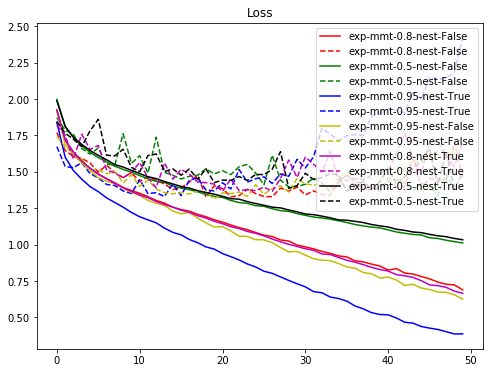

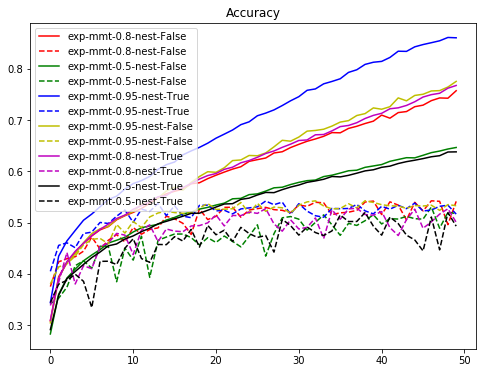

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()